In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import os
import gdown
import rarfile

# Download file again in case it wasn't extracted correctly
file_id = '1dyorpmEWOBd2V0b9UNwkJm3EDvLJU1FE'
url = f'https://drive.google.com/uc?id={file_id}'
output_rar = '/content/rice-leaf-diseases5c.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Verify and extract the RAR file
extracted_path = '/content/rice-leaf-diseases5c'
if rarfile.is_rarfile(output_rar):
    with rarfile.RarFile(output_rar, 'r') as rar_ref:
        rar_ref.extractall('/content')
    print("Extraction successful.")
else:
    print("The downloaded file is not a valid RAR file.")

# List contents of /content to check if extraction worked as expected
print("Contents of /content after extraction:", os.listdir('/content'))

# Check if the expected data directory now exists
if os.path.exists(extracted_path):
    print("Data directory found:", extracted_path)
else:
    print("Data directory not found. Check if it was extracted to a different path.")


Downloading...
From (original): https://drive.google.com/uc?id=1dyorpmEWOBd2V0b9UNwkJm3EDvLJU1FE
From (redirected): https://drive.google.com/uc?id=1dyorpmEWOBd2V0b9UNwkJm3EDvLJU1FE&confirm=t&uuid=11aa62db-c7bb-432d-9c1c-620589f6a1ac
To: /content/rice-leaf-diseases5c.rar
100%|██████████| 169M/169M [00:08<00:00, 20.9MB/s]


Extraction successful.
Contents of /content after extraction: ['.config', 'rice-leaf-diseases5c.rar', 'rice-leaf-diseases-detection-', 'sample_data']
Data directory not found. Check if it was extracted to a different path.


In [4]:
# Path of the extracted directory (replace with actual directory if different)
extracted_dir = '/content/rice-leaf-diseases-detection-'

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout

def alexnet(input_shape=(224, 224, 3), num_classes=5):
    inputs = Input(shape=input_shape)

    # 1st Convolutional Layer
    x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid')(inputs)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # 2nd Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # 3rd Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation

    # 4th Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation

    # 5th Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Flatten the output of the last convolutional layer
    x = Flatten()(x)

    # 1st Fully Connected Layer
    x = Dense(4096)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation
    x = Dropout(0.5)(x)

    # 2nd Fully Connected Layer
    x = Dense(4096)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)  # Swish activation
    x = Dropout(0.5)(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Build Model
    alexnet_model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return alexnet_model

# Example: Building and summarizing the AlexNet model
model = alexnet(input_shape=(224, 224, 3), num_classes=5)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 54, 54, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 12, 12, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 12, 12, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 12, 12, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 12, 12, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 256)           │              

 Total params: 46,805,765 (178.55 MB)

 Trainable params: 46,786,629 (178.48 MB)

 Non-trainable params: 19,136 (74.75 KB)

Found 6544 images belonging to 5 classes.
Found 1400 images belonging to 5 classes.
Found 1406 images belonging to 5 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.6100 - loss: 1.1712 - val_accuracy: 0.2314 - val_loss: 3.1237
Epoch 2/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.8023 - loss: 0.5584 - val_accuracy: 0.2550 - val_loss: 2.6046
Epoch 3/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8291 - loss: 0.4965 - val_accuracy: 0.5764 - val_loss: 1.9045
Epoch 4/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.8648 - loss: 0.3907 - val_accuracy: 0.5721 - val_loss: 2.3727
Epoch 5/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.8742 - loss: 0.3411 - val_accuracy: 0.5700 - val_loss: 2.4170
Epoch 6/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9010 - loss: 0.2658 - val_accuracy: 0.7493 - val_loss: 1.3541
Epoch 7/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9052 - loss: 0.2417 - val_accuracy: 0.8750 - val_loss: 0.3857
Epoch 8/40
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9138 - loss: 0.2268 - val_accura

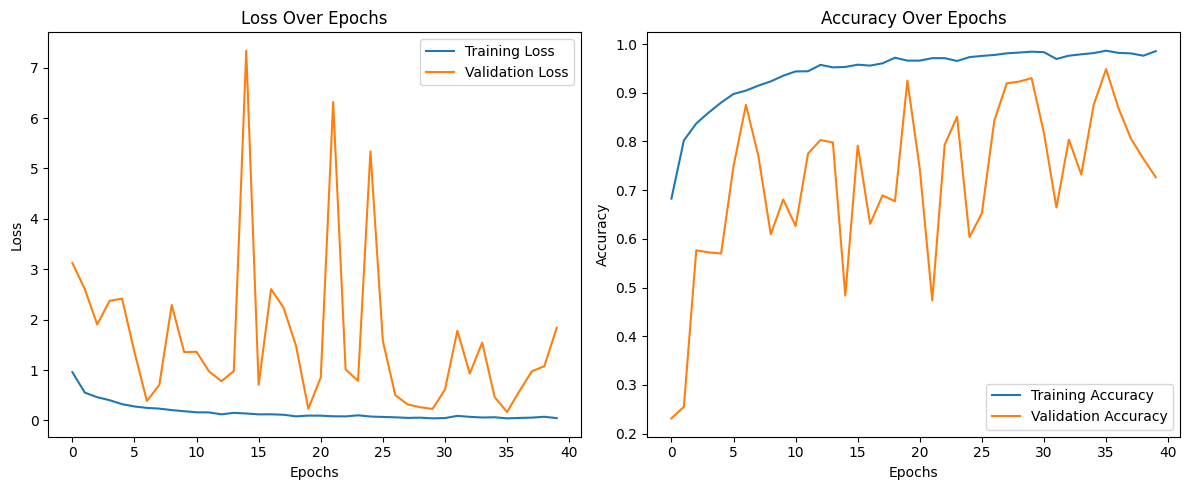

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step

Performance on Test Data
Precision: 0.7436722490141037
Recall: 0.7297297297297297
F1 Score: 0.6993561137264056
Accuracy: 0.7297297297297297
Confusion Matrix:
                        bacterial_leaf_blight  brown_spot  healthy  leaf_blast  \
bacterial_leaf_blight                    255           1        0           8   
brown_spot                               108          56       51          64   
healthy                                    9           5      238          31   
leaf_blast                                29           0       15         280   
rice_hispa                                 0          20       25          12   

                       rice_hispa  
bacterial_leaf_blight           1  
brown_spot                      0  
healthy                         0  
leaf_blast                      1  
rice_hispa                    197  


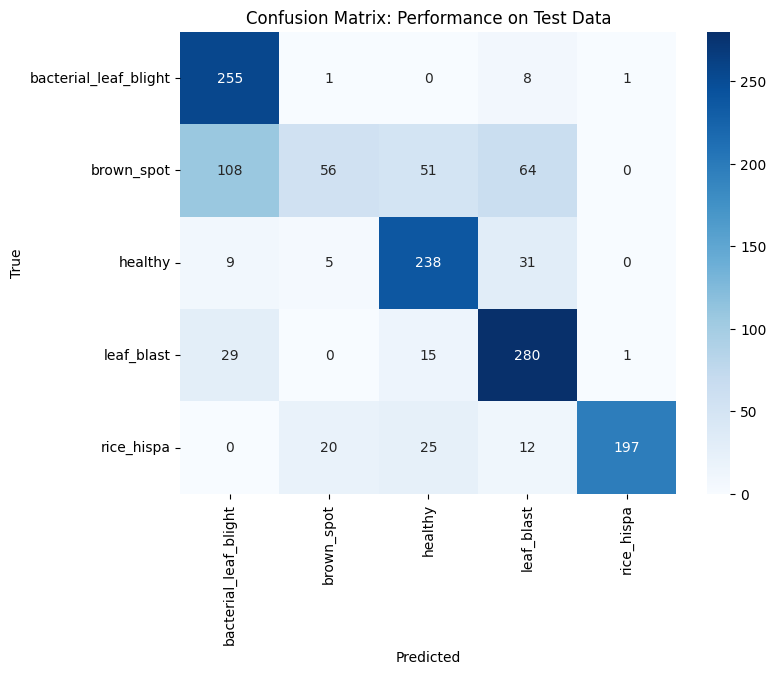

In [11]:
# Required Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Directory for the dataset
data_dir = '/content/rice-leaf-diseases-detection-'

# Compile the ReLU6-based AlexNet model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Image Data Generators for Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Train the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Plot training and validation results
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper Function to Evaluate the Model
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Confusion Matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
# Evaluate model on the test set
evaluate_model(test_generator, model, [
    'bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'rice_hispa'], title="Performance on Test Data")
